# Aula 7 - Tratamento de Dados - Parte 2

Nessa aula, iremos tratar dos seguintes conteúdos:

- Detecção de Outliers


## IDWT

<img src="https://i0.wp.com/www.r-exercises.com/wp-content/uploads/2017/05/monitor.png?resize=275%2C140" width=600>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

__3)__ Explore o dataset de Penguins do Seaborn, identifique problemas com os dados e faça as correções adequadas

In [17]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [18]:
## Primeira coisa: vamos ver quantos nulos temos
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [19]:
## Primeiro vou verificar inputs errados
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [20]:
penguins['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [21]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [22]:
## Verificados os valores inputados errados, vamos verificar correlação
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [23]:
penguins_without_flippers = penguins.drop(columns=['body_mass_g'])

In [26]:
penguins_without_flippers[penguins_without_flippers['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,NaN


In [27]:
penguins_clean = penguins_without_flippers.dropna(subset=['bill_length_mm'])

In [31]:
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(3), object(3)
memory usage: 18.7+ KB


## 

## Detecção de Outliers

**Relembrando - outliers, pontos "fora-da-curva" ou pontos aberrantes** : exemplos ou instâncias que, dentre do espaço de possíveis valores, recaem num intervalo *fora* daquele relativo a maior parte dos exemplos de uma base de dados.

Detectar outliers por meio de análise exploratória é útil para entender o comportamento da base de dados.

Existem também métodos **estatísticos** e de **aprendizado de máquina** que auxiliam nesse processo e que podem facilitar essa análise, detectando *outliers* de forma automática.

1. Dispersão: desvio padrão e intervalo interquartil
2. Distribuição: Normal univaridada
3. Agrupamento

In [32]:
# https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent
df_outliers = pd.read_csv("../datasets/houses_to_rent.csv")
df_outliers.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6,1000,2800,nr,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2,270,1112,22,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat


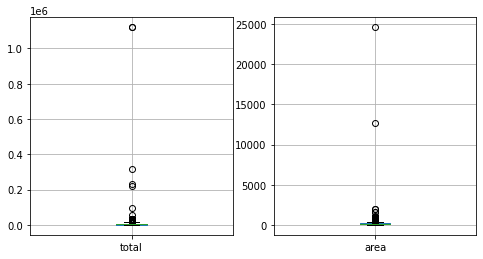

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(121); df_outliers.boxplot(['total'])
plt.subplot(122); df_outliers.boxplot(['area'])
plt.show()

###  Desvio padrão e amplitude inter-quartil (por dispersão)

Para cada atributo, podemos estudar como os valores estão relacionados com a dispersão dos dados.

Entre as medidas de dispersão temos:
* desvio padrão amostral (*standard deviation*)
    Seja $\mu$ a média de uma variável,
    $$\sigma = \frac{\sqrt{ \sum_i (x_i - \mu)^2}}{n-1}$$


* amplitude - ou intervalo - interquartil (IQR, *interquartile range*)
    Sejam:
    - $Q_{1}$ o valor relativo aos primeiros 25% dados,
    - $Q_{2}$ o valor relativo aos primeiros 50% dados (mediana),
    - $Q_{3}$ o valor relativo aos primeiros 75% dos dados,
    
    $$IQR = Q_{3} - Q_{1}$$

In [34]:
df_outliers.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11687.000000,11686.000000,11765.000000,8800.000000,1.176500e+04,11765.000000,11765.000000,1.176500e+04,11765.000000,11765.000000,11765.000000,11765.000000
mean,145.652691,2.496406,2.280408,2.181705,1.162632e+03,4033.429154,56.525032,5.622370e+03,593.139992,73.644454,228.023969,10.307012
std,288.676311,1.165594,1.445071,1.519448,1.486720e+04,3564.190560,97.487374,1.579576e+04,559.727661,35.725794,174.183959,5.101312
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,200.000000,3.000000,2.635000e+02,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,1.600000e+02,1600.000000,22.000000,2.176000e+03,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,5.610000e+02,2790.000000,37.000000,3.762000e+03,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1.300000e+03,5100.000000,70.000000,6.990000e+03,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,1.117000e+06,45000.000000,6000.000000,1.119892e+06,6444.000000,358.000000,2148.000000,51.000000


In [36]:
# selecionando segundo o total
Q1 = df_outliers['total'].quantile(0.25) ## É a mesma coisa que pedir o primeiro quartil
Q3 = df_outliers['total'].quantile(0.75)

IQR = Q3 - Q1 ## Distancia entre quartis


4814.0

In [45]:
Q3 + IQR*1.5

14211.0

In [40]:
## Outliers segundo o critério do IQR
dataout_iqr_mask = (df_outliers['total'] < Q1 - (IQR*1.5)) | (df_outliers['total'] > Q3 + (IQR*1.5))
df_outliers[dataout_iqr_mask].sort_values(by='total')

## Apenas Inliers segundo o critério do IQR
datain_iqr_mask = (df_outliers['total'] >= Q1 - (IQR*1.5)) & (df_outliers['total'] <= Q3 + (IQR*1.5))
df_iqr_clean = df_outliers[datain_iqr_mask]

In [41]:
df_iqr_clean

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6,1000,2800,nr,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2,270,1112,22,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11759,São Paulo,83.0,3.0,2,2.0,11,888,7521,221,96,8726.0,1116,84,372,12,flat
11760,São Paulo,150.0,3.0,3,2.0,8,0,13500,0,172,13672.0,2124,114,708,16,flat
11761,Porto Alegre,63.0,2.0,1,1.0,5,402,1478,24,22,1926.0,58,86,116,12,flat
11763,Brotas,100.0,1.0,2,1.0,-,0,800,116,39,955.0,148,127,148,18,house


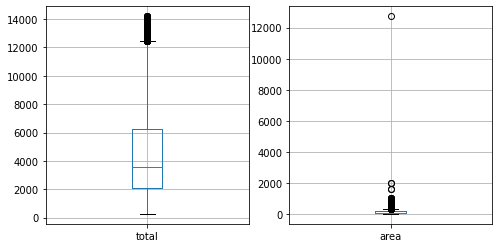

In [43]:
plt.figure(figsize=(8,4))
plt.subplot(121); df_iqr_clean.boxplot(['total'])
plt.subplot(122); df_iqr_clean.boxplot(['area'])
plt.show()

In [46]:
# Valor t -> é a quantidade de vezes que vamos somar ou subtrair o desvio padrao
desvp = df_outliers['total'].std()
media = df_outliers['total'].mean()


In [53]:
## Vai cortar fora, tudo que estiver maior que
## media = 5.622
## desvp = 15.795,75
t=1.5
media + desvp * t

29316.012484866857

In [56]:
# apenas outliers segundo critério do std
dataout_std_mask = (df_outliers['total'] < media - (desvp*t)) | (df_outliers['total'] > media + (desvp*t))
df_outliers[dataout_std_mask].sort_values(by='total')
# apenas inliers segundo critério do std
datain_std_mask = (df_outliers['total'] >= media - (desvp*t)) & (df_outliers['total'] <= media + (desvp*t))
df_std_clean = df_outliers[datain_std_mask]

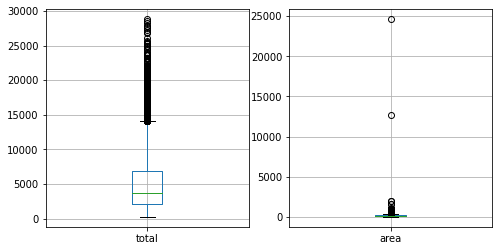

In [57]:
plt.figure(figsize=(8,4))
plt.subplot(121); df_std_clean.boxplot(['total'])
plt.subplot(122); df_std_clean.boxplot(['area'])
plt.show()

Vamos escrever uma função para remoção de outliers segundo o IQR:

In [63]:
np.issubdtype(df_outliers['bathroom'].dtype, np.number)

True

In [70]:
def remove_outliers_IQR(df, attributes, factor):
    '''
    funcao para remover outliers com base no IQR
    parametros:
        - df : dataframe
        - attributes : lista de atributos que saem
        - factor : fator do IQR que vamos somar / subtrair
    '''
    df_copy = df.copy()
    for var in attributes:
        ## verificar se a variável é numérica
        if np.issubdtype(df[var].dtype, np.number): ## Me retorna verdade se é float ou int
            Q1 = df_copy[var].quantile(0.25)
            Q3 = df_copy[var].quantile(0.75)
            IQR = Q3 - Q1
            
            inliers_mask = (df_copy[var] >= Q1 - (IQR * factor)) & (df_copy[var] <= Q3 + (IQR * factor))
            df_copy = df_copy[inliers_mask]
            
    return df_copy

In [71]:
df_clean = remove_outliers_IQR(df_outliers, ['total', 'area'], 1.5)

In [72]:
df_clean

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6,1000,2800,nr,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2,270,1112,22,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11759,São Paulo,83.0,3.0,2,2.0,11,888,7521,221,96,8726.0,1116,84,372,12,flat
11760,São Paulo,150.0,3.0,3,2.0,8,0,13500,0,172,13672.0,2124,114,708,16,flat
11761,Porto Alegre,63.0,2.0,1,1.0,5,402,1478,24,22,1926.0,58,86,116,12,flat
11763,Brotas,100.0,1.0,2,1.0,-,0,800,116,39,955.0,148,127,148,18,house


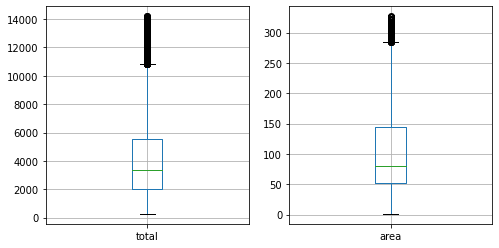

In [73]:
plt.figure(figsize=(8,4))
plt.subplot(121); df_clean.boxplot(['total'])
plt.subplot(122); df_clean.boxplot(['area'])
plt.show()

## Exercícios

__1)__ Utilizando a base de dados **antes** da remoção de outliers, elimine todas as linhas duplicadas. Quantas linhas foram removidas?

__2)__ Utilizando a base de dados **após** da remoção de outliers (`data_out`), elimine todas as linhas duplicadas. Quantas linhas foram removidas?

## Funções utéis

#### A função apply
É uma função que possibilita que definamos uma função e apliquemos ela em todas as linhas do nosso dataset

In [ ]:
## Vamos ver no dataset de gorjetas
tips = sns.load_dataset('tips')
tips.head()

#### A função get dummies

In [ ]:
## Vamos ver para sex

## Exercícios

__3)__ Utilizando o dataset de insurance, pede-se:
- Crie dummies para a coluna region
- Calcule a tarifa por pessoa (assumindo que os filhos estão inclusos no cálculo e que um fumante vale por 2 pessoas)

In [ ]:
insurance = pd.read_csv('../datasets/insurance.csv')
insurance.head()

## Links, Artigos e Referências:

- [7 Must know Data Wrangling operations with Python Pandas](https://towardsdatascience.com/7-must-know-data-wrangling-operations-with-python-pandas-849438a90d15), artigo publicado pelo Towards Data Science;
- [Data Wrangling in Pandas](https://towardsdatascience.com/data-wrangling-in-pandas-a-downloadable-cheatsheet-84326d255a7b), artigo publicado pelo Towards Data Science;
- [A Checklist for Data Wrangling](https://towardsdatascience.com/a-checklist-for-data-wrangling-8f106c093fef), artigo publicado pelo Towards Data Science;
- [The ultimate Guide to Data Cleaning](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4), artigo publicado pelo Towards Data Science.